In [1]:
//%jsroot on

In [2]:
        int start = 453;
        int stop = 530;
        TChain *fch;
        fch = new TChain("tree", "tele");
        for (int i= start; i<=stop; i++){
          TString fileName = TString::Format("/data/d1/zhuhy/lanzhou2022/getdatappac/newtestn15_2/tele%04d.root" , i);
          fch->AddFile(fileName.Data());
        }
        start = 749;
        stop = 809;
        for (int i= start; i<=stop; i++){
          TString fileName = TString::Format("/data/d1/zhuhy/lanzhou2022/getdatappac/newtestn15_2/tele%04d.root" , i);
          //fch->AddFile(fileName.Data());
        }

In [3]:
TCanvas *c1=new TCanvas("c1","c1");

In [4]:
Double_t a=0.095;
Double_t b=-0.129;
Double_t c=0;
/******************/
Int_t stripnum=2;
/******************/

c1->Clear();

TString name=TString::Format("(TMath::Sqrt(taf_ad2_xne[0]*taf_ac2_e[0]+%f*taf_ad2_xne[0]*taf_ad2_xne[0])+%f*taf_ac2_e[0]):taf_ac2_e[0]",a,b);
TString drawname=name+">>(100,0,20000,100,7000,10000)";
//TString Ef=TString::Format("(TMath::Sqrt(ta.ad3.xne[0]*ta.ad4.xne[0]+%f*ta.ad3.xne[0]*ta.ad3.xne[0])+%f*ta.ad4.xne[0])",a[stripnum],b[stripnum]);
TString cutname_bac=TString::Format("taf_ac2_e[0]>0&&taf_ac2_e[0]!=65535&&taf_ad2_xs[0]==%d&&taf_ad2_xne[0]>0&&taf_ad2_xne[0]!=65535",stripnum);
//TString cutname=cutname_bac+"&&"+Ef+">=13/25*ta.ad4.xne[0]+200";
//fch->Draw(drawname.Data(),cutname_bac.Data(),"colz");
gStyle->SetOptStat(0);
//c1->Draw();

In [5]:
TFile *fout = new TFile("/home/zhuhy/JNBook/Experiment2022/taf/PIDpeakfind/graph/taf_ad0_sigma.root","recreate");
fout->cd();

In [6]:
TGraph *sigma = new TGraph();
TGraph *rate = new TGraph();
Int_t count=0,counttemp=0;
//TF1 *g1 = new TF1("g1","gaus");
TF1 *g1=new TF1("g1","[0]*TMath::Exp(-0.5*((x-[1])/[2])^2)+[3]*TMath::Exp(-0.5*((x-[4])/[5])^2)",7500,9500);
  Int_t left=7000,right=10000;
  Double_t nvall;
  Int_t _bin=50,cmin;
  Double_t amin,bmin;
Double_t xsigmamin=100000,hi[5],nowmean[5],nowsigma[5],xamin,xbmin,xaa,xbb;
/*
TF1 *fun2peak=new TF1("fun2peak","[0]*TMath::Exp(-0.5*((x-[1])/[2])^2)+[3]*TMath::Exp(-0.5*((x-[4])/([2]*1.25))^2)",1300,2000);
  fun2peak->SetParameter(0,4000);
  fun2peak->SetParameter(1,1520);
  fun2peak->SetParameter(2,100);
  fun2peak->SetParameter(3,1800);
  fun2peak->SetParameter(4,1800);
*/
TH1F *h[200];
TString find;
TString canvasname;
Double_t sigmamin=10000,nnowmean=0,nvallmin=100;
a=0.095;
b=-0.129;
c=0;
Double_t nsigma;
//cutname=cutname+"&&"+Ef+">=13/25*ta.ad4.xne[0]+180";
//for(a=0.090;a<=0.105;a=a+0.001){
//for(b=-0.140;b<=-0.120;b=b+0.001){
//for(c=10;c<=40;c=c+1){
drawname=TString::Format("(TMath::Sqrt(taf_ad2_xne[0]*taf_ac2_e[0]+%f*taf_ad2_xne[0]*taf_ad2_xne[0])+%f*taf_ac2_e[0])>>h%d(%d,7001,10000)",a,b,count,_bin);
cutname_bac=TString::Format("taf_ac2_e[0]>0&&taf_ac2_e[0]!=65535&&taf_ad2_xs[0]==%d&&taf_ad2_xne[0]>0&&taf_ad2_xne[0]!=65535&&taf_ac2_e[0]<6000",stripnum);
fch->Draw(drawname.Data(),cutname_bac.Data());
find=TString::Format("h%d",count);
h[count]=(TH1F*)gROOT->FindObject(find.Data());


  g1->SetParameter(0,100);
  g1->SetParameter(1,8200);
  g1->SetParameter(2,100);
  g1->SetParLimits(2,0.,400.);

  g1->SetParameter(3,300);
  g1->SetParameter(4,8900);
  g1->SetParameter(5,100);
  g1->SetParLimits(5,0.,400.);

h[count]->Fit("g1","RL","",7500,9500);
    
nsigma=2;
//h[count]->Fit("g1","Q","",g1->GetParameter(1)-nsigma*g1->GetParameter(2),g1->GetParameter(1)+nsigma*g1->GetParameter(2));
//h[count]->Fit("g1","Q","",g1->GetParameter(1)-nsigma*g1->GetParameter(2),g1->GetParameter(1)+nsigma*g1->GetParameter(2));


//if(fun2peak->GetParameter(2)<sigmamin){sigmamin=fun2peak->GetParameter(2);counttemp=count;}
sigma->SetPoint(count,b,g1->GetParameter(2));
nvall=(h[count]->GetBinContent((Int_t)(g1->GetParameter(1)+nsigma*g1->GetParameter(2))*_bin/right+0)+
       h[count]->GetBinContent((Int_t)(g1->GetParameter(1)+nsigma*g1->GetParameter(2))*_bin/right+1)+
       h[count]->GetBinContent((Int_t)(g1->GetParameter(1)+nsigma*g1->GetParameter(2))*_bin/right+2))/3.;
if(g1->GetParameter(2)<sigmamin){sigmamin=g1->GetParameter(2);counttemp=count;nnowmean=g1->GetParameter(1);amin=a;bmin=b;}
//if(nvall<nvallmin){nvallmin=nvall;counttemp=count;sigmamin=g1->GetParameter(2);nowmean=g1->GetParameter(1);cmin=c;amin=a;bmin=b;}
rate->SetPoint(count,b,nvall/g1->GetParameter(0));
count++;
//}

    for(Int_t ii=0;ii<2;ii++){
        hi[ii]=g1->GetParameter(0+ii*3);
        nowmean[ii]=g1->GetParameter(1+ii*3);
        nowsigma[ii]=g1->GetParameter(2+ii*3);
    }

h[counttemp]->GetYaxis()->SetNdivisions(5); // 计算需要的刻度数量
h[counttemp]->GetYaxis()->SetNoExponent(true);         // 禁用科学计数法
h[counttemp]->GetXaxis()->SetNdivisions(5); // 计算需要的刻度数量
h[counttemp]->GetXaxis()->SetNoExponent(true);         // 禁用科学计数法
h[counttemp]->GetXaxis()->SetLabelSize(0.08);  // 放大X轴数字字体
h[counttemp]->GetYaxis()->SetLabelSize(0.08);  // 可选：同时放大Y轴字体

gStyle->SetOptStat(0);
TString name_pff1= TString::Format("%f*TMath::Exp(-0.5*((x-%f)/%f)^2)",hi[0],nowmean[0],nowsigma[0]);
TF1 *pff1=new TF1("pff1",name_pff1.Data(),nowmean[0]-3*nowsigma[0],nowmean[0]+3*nowsigma[0]);
TString name_pff2= TString::Format("%f*TMath::Exp(-0.5*((x-%f)/%f)^2)",hi[1],nowmean[1],nowsigma[1]);
TF1 *pff2=new TF1("pff2",name_pff2.Data(),nowmean[1]-3*nowsigma[1],nowmean[1]+3*nowsigma[1]);



//}

 FCN=89.6727 FROM MIGRAD    STATUS=CONVERGED     260 CALLS         261 TOTAL
                     EDM=3.85781e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.31854e+01   4.16569e+00   2.17022e-02  -8.85217e-05
   2  p1           8.10756e+03   1.03913e+01   5.68342e-02   5.82704e-06
   3  p2           2.18404e+02   8.42458e+00   1.89898e-04  -9.91740e-05
   4  p3           3.27493e+02   8.82016e+00   4.67155e-02   5.73522e-05
   5  p4           8.79735e+03   3.94315e+00   2.35673e-02   8.25615e-05
   6  p5           1.58493e+02   2.95166e+00   7.36038e-05   2.96918e-02
                               ERR DEF= 0.5


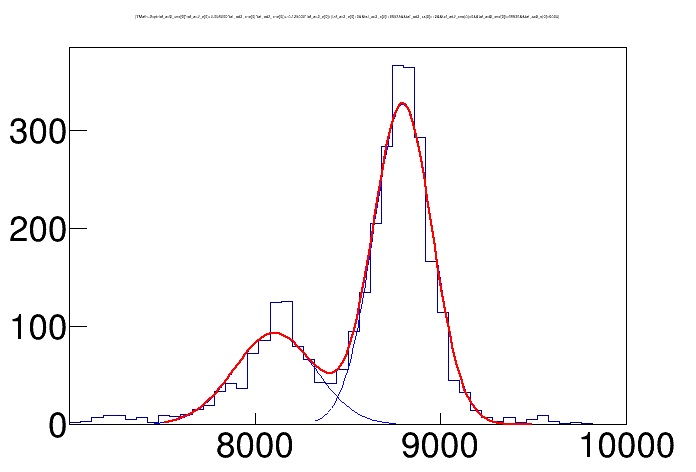

In [7]:
c1->Clear();
h[counttemp]->GetXaxis()->SetLabelSize(0.08);  // 放大X轴数字字体
h[counttemp]->GetYaxis()->SetLabelSize(0.08);  // 可选：同时放大Y轴字体
h[counttemp]->GetYaxis()->SetNdivisions(5); // 计算需要的刻度数量
h[counttemp]->GetYaxis()->SetNoExponent(true);         // 禁用科学计数法
h[counttemp]->GetXaxis()->SetNdivisions(5); // 计算需要的刻度数量
h[counttemp]->GetXaxis()->SetNoExponent(true);         // 禁用科学计数法
h[counttemp]->Draw();
pff1->SetLineColor(kBlue);
pff1->SetLineWidth(1);
pff1->Draw("same");
pff2->SetLineColor(kBlue);
pff2->SetLineWidth(1);
pff2->Draw("same");
h[counttemp]->Draw("samep");
c1->Draw();

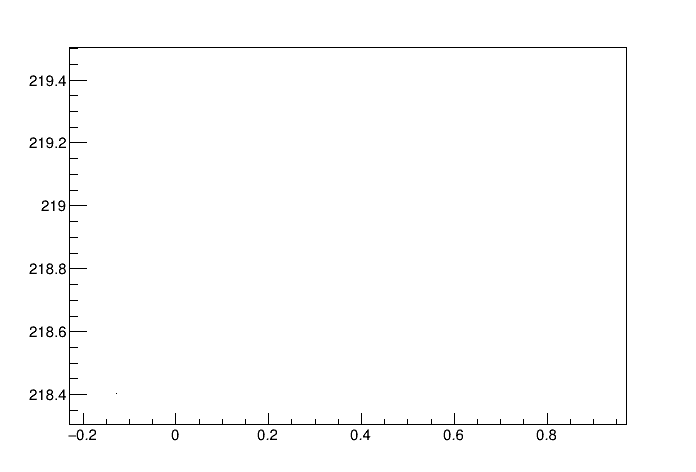

amin=0.095
bmin=-0.129
sigmamin=218.404
nowmean=0x7fc779eb2120


In [8]:

cout<<"amin="<<amin<<'\n';
cout<<"bmin="<<bmin<<'\n';
cout<<"sigmamin="<<sigmamin<<'\n';
cout<<"nowmean="<<nowmean<<'\n';

c1->Clear();
sigma->Draw("");
canvasname=TString::Format("sigma"); 
c1->SetName(canvasname.Data());
c1->Draw();
c1->Write();




In [9]:
/*
c1->Clear();
rate->Draw("");
canvasname=TString::Format("rate"); 
c1->SetName(canvasname.Data());
c1->Draw();
c1->Write();
*/

In [10]:
fout->Close();